In [1]:
# import all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scikitplot as skplt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
import sklearn.metrics as metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, balanced_accuracy_score

In [2]:
DATASET = 'num'

SCALING = False

GRIDSEARCH = False

In [3]:
if DATASET == 'cat':
    df = pd.read_csv("../data/speeddating/speeddating_cat.csv")
else:
    df = pd.read_csv("../data/speeddating/speeddating_num.csv")

train, test = train_test_split(df, test_size=0.2, random_state=44)

X_train = train.drop(['match'], axis=1)
y_train = train['match']
X_test = test.drop(['match'], axis=1)
y_test = test['match']

In [4]:
df.describe()#.to_csv('descr.csv', index=False)

,wave,d_age,samerace,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,...,race_european/caucasian-american,race_latino/hispanic american,race_other,race_o_asian/pacific islander/asian-american,race_o_black/african american,race_o_european/caucasian-american,race_o_latino/hispanic american,race_o_other,gender_female,gender_male
count,7849.000000,7849.000000,7849.000000,7849.00000,7849.000000,7849.000000,7849.000000,7849.000000,7849.000000,7849.000000,...,7849.000000,7849.000000,7849.000000,7849.000000,7849.000000,7849.000000,7849.000000,7849.000000,7849.000000,7849.000000
mean,11.324118,3.766849,0.404892,3.78303,3.659702,22.307156,17.452342,20.316890,17.437718,10.702835,...,0.568353,0.079501,0.064212,0.240031,0.048796,0.566696,0.080647,0.063830,0.499809,0.500191
std,5.975309,3.377976,0.490902,2.84508,2.804541,12.377736,7.039475,6.792136,6.083047,6.104028,...,0.495337,0.270536,0.245146,0.427129,0.215455,0.495563,0.272310,0.244465,0.500032,0.500032
min,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,1.000000,0.000000,1.00000,1.000000,15.000000,15.000000,17.500000,15.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11.000000,3.000000,0.000000,3.00000,3.000000,20.000000,18.370000,20.000000,18.000000,10.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,15.000000,5.000000,1.000000,6.00000,6.000000,25.000000,20.000000,23.810000,20.000000,15.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,21.000000,32.000000,1.000000,10.00000,10.000000,100.000000,60.000000,50.000000,50.000000,53.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
if SCALING:
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

#### Define Hyperparameters to test

In [6]:
# knn
n_neighbour = np.arange(5, 26, 2) 
distance = ['manhattan', 'euclidean', 'chebyshev']

# svc
C = np.logspace(-5, 5)

# trees
rf_n_estimators = np.arange(50, 151, 25)
rf_max_depth = np.arange(15, 51, 5)
rf_max_features = ['auto', 'log2']

cv = KFold(n_splits=5, shuffle=False, random_state=42)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


### scores

In [7]:
# Scores: MSE, RMSE, R2
def print_performance(y_test, y_pred):
    # Mean Squared Error
    print("MSE: ", metrics.mean_squared_error(y_test,y_pred))
    
    print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    
    # R2 is between 0 and 100 percent
    # 0 indicates that the model explains none of the variability of the response data around its mean.
    # 100 indicates that the model explains all the variability of the response data around its mean.
    print("R2: ", metrics.r2_score(y_test,y_pred) * 100)

# Metrics: various fancy metrics
def print_metrics(y_test, y_pred):
    results = pd.DataFrame(list(zip(y_test, y_pred)), 
                   columns =['Wage_test', 'Wage_prediction']) 
    
    accuracy = results["Wage_test"] - results["Wage_prediction"]
    accuracy = np.square(accuracy)
    accuracy = np.sqrt(accuracy)
    
    print("# compare test and prediction")
    print(results)
    
    print("# bad predictions (over 100 difference)")
    print(results[(results["Wage_test"] - results["Wage_prediction"]) > 5])
    
    print("# span of data")
    span = results["Wage_test"].max() - results["Wage_test"].min()
    print(span)
    
    print("# median accuracy")
    median = np.median(accuracy) 
    print(median)
    
    print("# percent deviation")
    percent = median / span * 100
    percent_str = "{:.4f}".format(percent)
    percent_str = percent_str + " %"
    print(percent_str)
    
def show_roc(y_test, y_pred):
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

#### KNN

In [8]:
def knn_grid(X_train, y_train, X_test):
    print('\nKNN')
    grid = GridSearchCV(estimator=KNeighborsClassifier(),cv=cv,
                 param_grid={'n_neighbors': n_neighbour,
                            'metric': metric})
    grid.fit(X_train, y_train)
    print(grid.best_params_)
    return grid.predict(X_test)

def knn(X_train, y_train, X_test):    
    print('\nKNN')
    if DATASET == 'cat':
        if SCALING:
            knn = KNeighborsClassifier(n_neighbors=25, metric='euclidean')
        else:
            knn = KNeighborsClassifier(n_neighbors=25, metric='manhattan')
    else:
        if SCALING:
            knn = KNeighborsClassifier(n_neighbors=23, metric='euclidean')
        else:
            knn = KNeighborsClassifier(n_neighbors=21, metric='manhattan')
            
    knn.fit(X_train, y_train)
    return knn.predict(X_test)


if GRIDSEARCH:
    y_test_knn = knn_grid(X_train, y_train, X_test)
else:
    y_test_knn = knn(X_train, y_train, X_test)



KNN


MSE:  0.1681528662420382
RMSE:  0.4100644659587541
R2:  -20.21439509954055
# compare test and prediction
      Wage_test  Wage_prediction
0             1                0
1             0                0
2             1                0
3             0                0
4             0                0
...         ...              ...
1565          0                0
1566          0                0
1567          1                0
1568          0                0
1569          0                0

[1570 rows x 2 columns]
# bad predictions (over 100 difference)
Empty DataFrame
Columns: [Wage_test, Wage_prediction]
Index: []
# span of data
1
# median accuracy
0.0
# percent deviation
0.0000 %
[[1302    4]
 [ 260    4]]


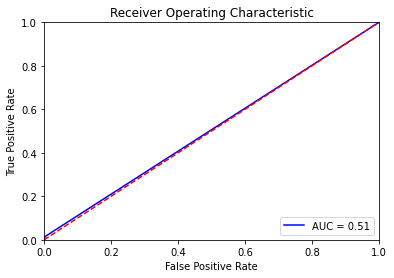

In [9]:
print_performance(y_test, y_test_knn)
print_metrics(y_test, y_test_knn)
print(metrics.confusion_matrix(y_test, y_test_knn))
show_roc(y_test, y_test_knn)

# P = precision_score(y_test, y_test_knn)
# R = recall_score(y_test, y_test_knn)
# A = accuracy_score(y_test, y_test_knn)
# BA = balanced_accuracy_score(y_test, y_test_knn)
# [P,R,A,BA]

#### SVC

In [10]:
def svc_grid(X_train, y_train, X_test):
    print('\nSVC')
    grid = GridSearchCV(estimator=LinearSVC(random_state=42, dual=False), cv=cv,
                 param_grid={'C': C})
    grid.fit(X_train, y_train)
    print(grid.best_params_)
    y_pred = grid.predict(X_test)
    return y_pred

def svc(X_train, y_train, X_test):    
    print('\nSVC')
    if DATASET == 'cat':
        if SCALING:
            svc = LinearSVC(random_state=42, dual=False, C=0.004498432668969444)
        else:
            svc = LinearSVC(random_state=42, dual=False, C=0.0071968567300115215)
    else:
        if SCALING:
            svc = LinearSVC(random_state=42, dual=False, C=0.004498432668969444)
        else:
            svc = LinearSVC(random_state=42, dual=False, C=0.002811768697974231)
            
    svc.fit(X_train, y_train)
    return svc.predict(X_test)


if GRIDSEARCH:
    y_test_svc = svc_grid(X_train, y_train, X_test)
else:
    y_test_svc = svc(X_train, y_train, X_test)



SVC


MSE:  0.0
RMSE:  0.0
R2:  100.0
# compare test and prediction
      Wage_test  Wage_prediction
0             1                1
1             0                0
2             1                1
3             0                0
4             0                0
...         ...              ...
1565          0                0
1566          0                0
1567          1                1
1568          0                0
1569          0                0

[1570 rows x 2 columns]
# bad predictions (over 100 difference)
Empty DataFrame
Columns: [Wage_test, Wage_prediction]
Index: []
# span of data
1
# median accuracy
0.0
# percent deviation
0.0000 %
[[1306    0]
 [   0  264]]


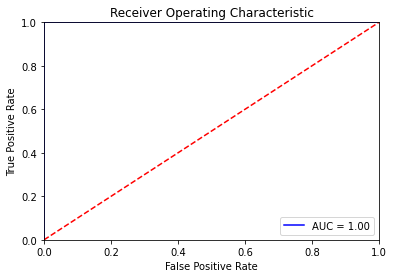

In [11]:
print_performance(y_test, y_test_svc)
print_metrics(y_test, y_test_svc)
print(metrics.confusion_matrix(y_test, y_test_svc))
show_roc(y_test, y_test_svc)

# P = precision_score(y_test, y_test_svc)
# R = recall_score(y_test, y_test_svc)
# A = accuracy_score(y_test, y_test_svc)
# BA = balanced_accuracy_score(y_test, y_test_svc)
# [P,R,A,BA]

#### Random Forest

In [12]:
def randomForest_grid(X_train, y_train, X_test):
    print('\nRandom Forest')
    grid = GridSearchCV(estimator=RandomForestClassifier(),cv=cv,
                 param_grid={'n_estimators': rf_n_estimators,
                             'max_depth': rf_max_depth,
                             'max_features': rf_max_features})
    grid.fit(X_train, y_train)
    print(grid.best_params_)
    y_pred = grid.predict(X_test)
    return y_pred

def randomForest(X_train, y_train, X_test):
    print('\nRandom Forest')
    if DATASET == 'cat':
        if SCALING:
            rf = RandomForestClassifier(max_depth=15, max_features='auto', n_estimators=100)
        else:
            rf = RandomForestClassifier(max_depth=40, max_features='auto', n_estimators=150)
    else:
        if SCALING:
            rf = RandomForestClassifier(max_depth=25, max_features='auto', n_estimators=150)
        else:
            rf = RandomForestClassifier(max_depth=40, max_features='auto', n_estimators=150)
    
    rf.fit(X_train, y_train)
    return rf.predict(X_test)


if GRIDSEARCH:
    y_test_rf = randomForest_grid(X_train, y_train, X_test)
else:
    y_test_rf = randomForest(X_train, y_train, X_test)



Random Forest


MSE:  0.0044585987261146496
RMSE:  0.06677273939351784
R2:  96.8124970996334
# compare test and prediction
      Wage_test  Wage_prediction
0             1                1
1             0                0
2             1                1
3             0                0
4             0                0
...         ...              ...
1565          0                0
1566          0                0
1567          1                1
1568          0                0
1569          0                0

[1570 rows x 2 columns]
# bad predictions (over 100 difference)
Empty DataFrame
Columns: [Wage_test, Wage_prediction]
Index: []
# span of data
1
# median accuracy
0.0
# percent deviation
0.0000 %
[[1306    0]
 [   0  264]]


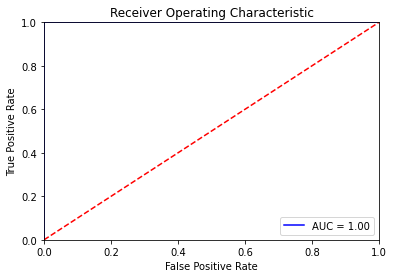

In [13]:
print_performance(y_test, y_test_rf)
print_metrics(y_test, y_test_rf)
print(metrics.confusion_matrix(y_test, y_test_svc))
show_roc(y_test, y_test_svc)

# P = precision_score(y_test, y_test_rf)
# R = recall_score(y_test, y_test_rf)
# A = accuracy_score(y_test, y_test_rf)
# BA = balanced_accuracy_score(y_test, y_test_rf)
# [P,R,A,BA]